# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

Define the problem you are finding answers for from the data given.

**What is the best state to invest money in to raise SAT participation rates?**

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [2]:
#Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [3]:
def read_csv(csv_loc):
    '''Function to read csv file for this project
    csv_loc: Relative filepath to csv file
    '''
    raw_pd = ''
    df = []
    with open(csv_loc, 'r') as f:
        raw_pd = f.read()
    for line in raw_pd.split('\n'):
        df.append(line.split(','))
    df = pd.DataFrame(df[1::],columns=df[0])
    return df

In [4]:
df_sat17 = read_csv('../data/sat_2017.csv')

In [5]:
df_sat17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               52 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     object
 3   Math                                51 non-null     object
 4   Total                               51 non-null     object
dtypes: object(5)
memory usage: 2.2+ KB


In [6]:
df_act17 = read_csv('../data/act_2017.csv')

In [7]:
df_act17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   State          53 non-null     object
 1   Participation  52 non-null     object
 2   English        52 non-null     object
 3   Math           52 non-null     object
 4   Reading        52 non-null     object
 5   Science        52 non-null     object
 6   Composite      52 non-null     object
dtypes: object(7)
memory usage: 3.0+ KB


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [8]:
df_sat17.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [9]:
df_act17.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

###### Answer:

The dataframes tabulates each state's participation rate and average performance in each field. 

SAT tracks two fields: 1: Evidence-Based Reading and Writing and 2: Math. 

ACT tracks four fields, English, Math, Reading and Science. 

Both original sources also provides the National average for each test, but these will not be required for our analysis.

#### 4a. Does the data look complete? 

###### Answer: 

No. The SAT imported data had one additional row, which is empty.

The ACT imported data also has one additional empty row, which needs to be removed. 

It also has one additional row which included the 'National' average.

Also, there is a wrong entry for the 'Composite' column for Wyoming. The value is '20.2x' rather than all numbers.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [10]:
df_sat17[df_sat17['State'] == 'Maryland']

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


In [11]:
df_act17[df_act17['State'] == 'Maryland']

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


###### Answer:

The entries for Maryland in both SAT and ACT imported data are wrong.

For the SAT scores, the values are typically in the range of 500. However, the entry is 52. 

For the ACT scores, the values are typically in the range of 20. The entry is 2.3.


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [12]:
# Set Maryland's average Math score in SAT 17 dataframe to the correct value
df_sat17.loc[df_sat17['State'] == 'Maryland','Math'] = '524'

In [13]:
# Set Maryland's average Science score in ACT 17 dataframe to the correct value
df_act17.loc[df_act17['State'] == 'Maryland', 'Science'] = '23.2'

In [14]:
# Remove additional empty row in SAT 17 dataframe
df_sat17 = df_sat17[df_sat17['State']!='']

In [15]:
# Remove additional 'State' and empty rows in ACT 17 dataframe
df_act17 = df_act17[(df_act17['State']!='') & (df_act17['State']!='National')]

#### 5. What are your data types? 
Display the data types of each feature. 

In [16]:
df_sat17.dtypes

State                                 object
Participation                         object
Evidence-Based Reading and Writing    object
Math                                  object
Total                                 object
dtype: object

In [17]:
df_act17.dtypes

State            object
Participation    object
English          object
Math             object
Reading          object
Science          object
Composite        object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

###### Answer:

All the data types have `object` dtype. 

Other than the 'State' column, the rest should be typecast to `float` for easier data manipulation and calculation.

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [18]:
# Function to convert Participation rate from string to float
def pc_to_float(df):
    '''Function to convert Participation rate data to float
        df : dataframe
    '''
    return df['Participation'].apply(lambda x : float(x.replace('%','')))

In [19]:
df_sat17['Participation'] = pc_to_float(df_sat17)

In [20]:
df_act17['Participation'] = pc_to_float(df_act17)

- Fix any individual values preventing other columns from being the appropriate type.

In [21]:
# Set the correct value for Wyoming's average Composite score
df_act17.loc[df_act17['State']=='Wyoming','Composite'] = '20.2'

- Finish your data modifications by making sure the columns are now typed appropriately.

In [22]:
for col in df_sat17.columns[2::]:
    df_sat17[col] = df_sat17[col].astype(float)

In [23]:
for col in df_act17.columns[2::]:
    df_act17[col] = df_act17[col].astype(float)

- Display the data types again to confirm they are correct.

In [24]:
df_sat17.dtypes

State                                  object
Participation                         float64
Evidence-Based Reading and Writing    float64
Math                                  float64
Total                                 float64
dtype: object

In [25]:
df_act17.dtypes

State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [26]:
df_sat17.rename(columns={
    'State' : 'state',
    'Participation' : 'sat17_partn',
    'Evidence-Based Reading and Writing' : 'sat17_erw',
    'Math' : 'sat17_math',
    'Total' : 'sat17_total'
}, inplace=True)

In [27]:
df_act17.rename(columns={
    'State' : 'state',
    'Participation' : 'act17_partn',
    'English' : 'act17_eng',
    'Math' : 'act17_math',
    'Reading' : 'act17_rdg',
    'Science' : 'act17_sci',
    'Composite' : 'act17_comp'
}, inplace=True)

#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|All datasets|The state in USA| 
|sat17_partn|float|SAT 2017|The participation rate (units percent to one decimal place 5.0 means 5.0%)|
|sat17_erw|float|SAT 2017|The state average Evidence Based Reading and Writing score|
|sat17_math|float|SAT 2017|The state average Math score|
|sat17_total|float|SAT 2017|The state average Total score|
|act17_partn|float|ACT 2017|The participation rate (units percent to one decimal place 5.0 means 5.0%)|
|act17_eng|float|ACT 2017|The state average English score|
|act17_math|float|ACT 2017|The state average Math score|
|act17_rdg|float|ACT 2017|The state average Reading score|
|act17_sci|float|ACT 2017|The state average Science score|
|act17_comp|float|ACT 2017|The state average Composite score|
|sat18_partn|float|SAT 2018|The participation rate (units percent to one decimal place 5.0 means 5.0%)|
|sat18_erw|float|SAT 2018|The state average Evidence Based Reading and Writing score|
|sat18_math|float|SAT 2018|The state average Math score|
|sat18_total|float|SAT 2018|The state average Total score|
|act18_partn|float|ACT 2018|The participation rate (units percent to one decimal place 5.0 means 5.0%)|
|act18_eng|float|ACT 2018|The state average English score|
|act18_math|float|ACT 2018|The state average Math score|
|act18_rdg|float|ACT 2018|The state average Reading score|
|act18_sci|float|ACT 2018|The state average Science score|
|act18_comp|float|ACT 2018|The state average Composite score|
|sat_partn_change|float|SAT 2017-2018|Change in  participation rates between 2017 and 2018 (units percent to one decimal place 5.0 means 5.0%)|
|sat_erw_change_pct|float|SAT 2017-2018|Percentage change in Evidence Based Reading and Writing score between 2017 and 2018 (units percent to one decimal place 5.0 means 5.0%)|
|sat_math_change_pct|float|SAT 2017-2018|Percentage change in Math score between 2017 and 2018 (units percent to one decimal place 5.0 means 5.0%)|
|sat_total_change_pct|float|SAT 2017-2018|Percentage change in Total score between 2017 and 2018 (units percent to one decimal place 5.0 means 5.0%)
|act_partn_change|float|ACT 2017-2018|Change in participation rates between 2017 and 2018 (units percent to one decimal place 5.0 means 5.0%)|
|act_eng_change_pct|float|ACT 2017-2018|Percentage change in English score between 2017 and 2018 (units percent to one decimal place 5.0 means 5.0%)
|act_math_change_pct|float|ACT 2017-2018|Percentage change in Math score between 2017 and 2018 (units percent to one decimal place 5.0 means 5.0%)
|act_sci_change_pct|float|ACT 2017-2018r|Percentage change in Science score between 2017 and 2018 (units percent to one decimal place 5.0 means 5.0%)
|act_comp_change_pct|float|ACT 2017-2018|Percentage change in Composite score between 2017 and 2018 (units percent to one decimal place 5.0 means 5.0%)
|sat_reqd|bool|2018|Whether SAT is a mandatory requirement in the state as of 2018. True : Yes, False : No
|act_reqd|bool|2018|Whether ACT is a mandatory requirement in the state as of 2018. True : Yes, False : No

#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

*Performed in one of the earlier steps*

#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [28]:
df_combined17 = pd.merge(df_sat17, df_act17, how='left')

In [29]:
df_combined17.head()

,state,sat17_partn,sat17_erw,sat17_math,sat17_total,act17_partn,act17_eng,act17_math,act17_rdg,act17_sci,act17_comp
0,Alabama,5.0,593.0,572.0,1165.0,100.0,18.9,18.4,19.7,19.4,19.2
1,Alaska,38.0,547.0,533.0,1080.0,65.0,18.7,19.8,20.4,19.9,19.8
2,Arizona,30.0,563.0,553.0,1116.0,62.0,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3.0,614.0,594.0,1208.0,100.0,18.9,19.0,19.7,19.5,19.4
4,California,53.0,531.0,524.0,1055.0,31.0,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [30]:
df_combined17.to_csv('../data/combined_2017.csv',index=False)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [31]:
# Read csv file
df_sat18 = pd.read_csv('../data/sat_2018.csv')

In [32]:
# Preview SAT 2018 data
df_sat18.head()

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149
3,Arkansas,5%,592,576,1169
4,California,60%,540,536,1076


In [33]:
# Check SAT 2018 data's Dtypes of each column and total number of entries
df_sat18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   State                               51 non-null     object
 1   Participation                       51 non-null     object
 2   Evidence-Based Reading and Writing  51 non-null     int64 
 3   Math                                51 non-null     int64 
 4   Total                               51 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [34]:
# Convert 'Participation' Dtype from string to float
df_sat18['Participation'] = pc_to_float(df_sat18)

In [35]:
# Convert other column Dtype from int to float
for col in df_sat18.columns[2::]:
    df_sat18[col] = df_sat18[col].astype(float)

In [36]:
# Rename columns in line with naming convention
df_sat18.rename(columns={
    'State' : 'state',
    'Participation' : 'sat18_partn',
    'Evidence-Based Reading and Writing' : 'sat18_erw',
    'Math' : 'sat18_math',
    'Total' : 'sat18_total'
}, inplace=True)

In [37]:
# check SAT 2018 data's min and max value for each column for any mis-entry
df_sat18.describe()

,sat18_partn,sat18_erw,sat18_math,sat18_total
count,51.000000,51.000000,51.000000,51.000000
mean,45.745098,563.686275,556.235294,1120.019608
std,37.314256,47.502627,47.772623,94.155083
min,2.000000,480.000000,480.000000,977.000000
25%,4.500000,534.500000,522.500000,1057.500000
50%,52.000000,552.000000,544.000000,1098.000000
75%,77.500000,610.500000,593.500000,1204.000000
max,100.000000,643.000000,655.000000,1298.000000


In [38]:
df_act18 = pd.read_csv('../data/act_2018_updated.csv')

In [39]:
# Preview ACT 2018 data
df_act18.head()

,State,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
0,Alabama,100,19.1,18.9,18.3,19.6,19.0
1,Alaska,33,20.8,19.8,20.6,21.6,20.7
2,Arizona,66,19.2,18.2,19.4,19.5,19.2
3,Arkansas,100,19.4,19.1,18.9,19.7,19.4
4,California,27,22.7,22.5,22.5,23.0,22.1


In [40]:
# check ACT 2018 data's Dtypes of each column and total number of entries
df_act18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          51 non-null     object 
 1   Percentage of Students Tested  51 non-null     int64  
 2   Average Composite Score        51 non-null     float64
 3   Average English Score          51 non-null     float64
 4   Average Math Score             51 non-null     float64
 5   Average Reading Score          51 non-null     float64
 6   Average Science Score          51 non-null     float64
dtypes: float64(5), int64(1), object(1)
memory usage: 2.9+ KB


In [41]:
# Convert 'Percentage of Students Tested' from int to float
df_act18['Percentage of Students Tested'] = df_act18['Percentage of Students Tested'].astype(float)

In [42]:
# check ACT 2018 data's min and max value for each column for any mis-entry
df_act18.describe()

,Percentage of Students Tested,Average Composite Score,Average English Score,Average Math Score,Average Reading Score,Average Science Score
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,61.647059,21.486275,20.988235,21.125490,22.015686,21.345098
std,34.080976,2.106278,2.446356,2.035765,2.167245,1.870114
min,7.000000,17.700000,16.600000,17.800000,18.000000,17.900000
25%,28.500000,19.950000,19.100000,19.400000,20.450000,19.850000
50%,66.000000,21.300000,20.200000,20.700000,21.600000,21.100000
75%,100.000000,23.550000,23.700000,23.150000,24.100000,23.050000
max,100.000000,25.600000,26.000000,25.200000,26.100000,24.900000


In [43]:
# Rename columns in line with naming convention
df_act18.rename(columns={
    'State' : 'state',
    'Percentage of Students Tested' : 'act18_partn',
    'Average English Score' : 'act18_eng',
    'Average Math Score' : 'act18_math',
    'Average Reading Score' : 'act18_rdg',
    'Average Science Score' : 'act18_sci',
    'Average Composite Score' : 'act18_comp'
}, inplace=True)

In [44]:
# Rearrange ACT 2018 dataframe colunms to match that of ACT 2017
col = list(df_act18.columns)
col.append(col.pop(2))
df_act18 = df_act18[col]

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [45]:
# Merge SAT and ACT data for 2018
df_combined18 = pd.merge(df_sat18, df_act18, how='left')

In [46]:
# Merge combined data from 2017 with that of 2018
df_final = pd.merge(df_combined17, df_combined18, how='left')

In [47]:
df_final.to_csv('../data/final.csv',index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [48]:
df_final.describe()

,sat17_partn,sat17_erw,sat17_math,sat17_total,act17_partn,act17_eng,act17_math,act17_rdg,act17_sci,act17_comp,sat18_partn,sat18_erw,sat18_math,sat18_total,act18_partn,act18_eng,act18_math,act18_rdg,act18_sci,act18_comp
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,556.882353,1126.098039,65.254902,20.931373,21.182353,22.013725,21.450980,21.519608,45.745098,563.686275,556.235294,1120.019608,61.647059,20.988235,21.125490,22.015686,21.345098,21.486275
std,35.276632,45.666901,47.121395,92.494812,32.140842,2.353677,1.981989,2.067271,1.739353,2.020695,37.314256,47.502627,47.772623,94.155083,34.080976,2.446356,2.035765,2.167245,1.870114,2.106278
min,2.000000,482.000000,468.000000,950.000000,8.000000,16.300000,18.000000,18.100000,18.200000,17.800000,2.000000,480.000000,480.000000,977.000000,7.000000,16.600000,17.800000,18.000000,17.900000,17.700000
25%,4.000000,533.500000,523.500000,1055.500000,31.000000,19.000000,19.400000,20.450000,19.950000,19.800000,4.500000,534.500000,522.500000,1057.500000,28.500000,19.100000,19.400000,20.450000,19.850000,19.950000
50%,38.000000,559.000000,548.000000,1107.000000,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,52.000000,552.000000,544.000000,1098.000000,66.000000,20.200000,20.700000,21.600000,21.100000,21.300000
75%,66.000000,613.000000,599.000000,1212.000000,100.000000,23.300000,23.100000,24.150000,23.200000,23.600000,77.500000,610.500000,593.500000,1204.000000,100.000000,23.700000,23.150000,24.100000,23.050000,23.550000
max,100.000000,644.000000,651.000000,1295.000000,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,643.000000,655.000000,1298.000000,100.000000,26.000000,25.200000,26.100000,24.900000,25.600000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [49]:
def get_std(series):
    '''Function to calculate standard deviation
    series : Series to be loaded in'''
    mean = series.mean()
    return round((np.sum([(i - mean)**2 for i in series])/series.count())**0.5,4)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [50]:
sd = [{col:get_std(df_final[col])} for col in df_final.columns[1::]]
sd

[{'sat17_partn': 34.9291},
 {'sat17_erw': 45.217},
 {'sat17_math': 46.6571},
 {'sat17_total': 91.5835},
 {'act17_partn': 31.8242},
 {'act17_eng': 2.3305},
 {'act17_math': 1.9625},
 {'act17_rdg': 2.0469},
 {'act17_sci': 1.7222},
 {'act17_comp': 2.0008},
 {'sat18_partn': 36.9466},
 {'sat18_erw': 47.0346},
 {'sat18_math': 47.3019},
 {'sat18_total': 93.2274},
 {'act18_partn': 33.7452},
 {'act18_eng': 2.4223},
 {'act18_math': 2.0157},
 {'act18_rdg': 2.1459},
 {'act18_sci': 1.8517},
 {'act18_comp': 2.0855}]

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

###### Answer:

No, the manually calculated standard deviations vary slightly from the output from pandas `describe` function

numpy's `std` method is the same as the manually calculated values.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Participation rates

#### States with highest participation rates for 2017 SAT

In [51]:
df_final[['state','sat17_partn']].sort_values('sat17_partn',ascending=False).head()

,state,sat17_partn
8,District of Columbia,100.0
22,Michigan,100.0
6,Connecticut,100.0
7,Delaware,100.0
29,New Hampshire,96.0


#### States with lowest participation rates for 2017 SAT

In [52]:
df_final[['state','sat17_partn']].sort_values('sat17_partn').head()

,state,sat17_partn
34,North Dakota,2.0
24,Mississippi,2.0
15,Iowa,2.0
25,Missouri,3.0
44,Utah,3.0


#### States with highest participation rates for 2018 SAT

In [53]:
df_final[['state','sat18_partn']].sort_values('sat18_partn',ascending=False).head()

,state,sat18_partn
5,Colorado,100.0
6,Connecticut,100.0
7,Delaware,100.0
22,Michigan,100.0
12,Idaho,100.0


#### States with lowest participation rates for 2018 SAT

In [54]:
df_final[['state','sat18_partn']].sort_values('sat18_partn').head()

,state,sat18_partn
34,North Dakota,2.0
50,Wyoming,3.0
41,South Dakota,3.0
27,Nebraska,3.0
49,Wisconsin,3.0


#### States with highest participation rates for 2017 ACT

In [55]:
df_final[['state','act17_partn']].sort_values('act17_partn',ascending=False).head()

,state,act17_partn
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0


#### States with lowest participation rates for 2017 ACT

In [56]:
df_final[['state','act17_partn']].sort_values('act17_partn').head()

,state,act17_partn
19,Maine,8.0
29,New Hampshire,18.0
7,Delaware,18.0
39,Rhode Island,21.0
38,Pennsylvania,23.0


#### States with highest participation rates for 2018 ACT

In [57]:
df_final[['state','act18_partn']].sort_values('act18_partn',ascending=False).head()

,state,act18_partn
0,Alabama,100.0
17,Kentucky,100.0
49,Wisconsin,100.0
44,Utah,100.0
42,Tennessee,100.0


#### States with lowest participation rates for 2018 ACT

In [58]:
df_final[['state','act18_partn']].sort_values('act18_partn').head()

,state,act18_partn
19,Maine,7.0
39,Rhode Island,15.0
29,New Hampshire,16.0
7,Delaware,17.0
38,Pennsylvania,20.0


### Mean total/composite scores

##### States with highest mean total scores for 2017 SAT

In [59]:
df_final[['state','sat17_total']].sort_values('sat17_total',ascending=False).head()

,state,sat17_total
23,Minnesota,1295.0
49,Wisconsin,1291.0
15,Iowa,1275.0
25,Missouri,1271.0
16,Kansas,1260.0


##### States with lowest mean total scores for 2017 SAT

In [60]:
df_final[['state','sat17_total']].sort_values('sat17_total').head()

,state,sat17_total
8,District of Columbia,950.0
7,Delaware,996.0
12,Idaho,1005.0
22,Michigan,1005.0
19,Maine,1012.0


##### States with highest mean total scores for 2018 SAT

In [61]:
df_final[['state','sat18_total']].sort_values('sat18_total',ascending=False).head()

,state,sat18_total
23,Minnesota,1298.0
49,Wisconsin,1294.0
34,North Dakota,1283.0
15,Iowa,1265.0
16,Kansas,1265.0


##### States with lowest mean total scores for 2018 SAT

In [62]:
df_final[['state','sat18_total']].sort_values('sat18_total').head()

,state,sat18_total
8,District of Columbia,977.0
7,Delaware,998.0
48,West Virginia,999.0
12,Idaho,1001.0
44,Utah,1010.0


##### States with highest mean composite scores for 2017 ACT

In [63]:
df_final[['state','act17_comp']].sort_values('act17_comp',ascending=False).head()

,state,act17_comp
29,New Hampshire,25.5
21,Massachusetts,25.4
6,Connecticut,25.2
19,Maine,24.3
8,District of Columbia,24.2


##### States with lowest mean composite scores for 2017 ACT

In [64]:
df_final[['state','act17_comp']].sort_values('act17_comp').head()

,state,act17_comp
28,Nevada,17.8
24,Mississippi,18.6
40,South Carolina,18.7
11,Hawaii,19.0
33,North Carolina,19.1


##### States with highest mean composite scores for 2018 ACT

In [65]:
df_final[['state','act18_comp']].sort_values('act18_comp',ascending=False).head()

,state,act18_comp
6,Connecticut,25.6
21,Massachusetts,25.5
29,New Hampshire,25.1
32,New York,24.5
22,Michigan,24.4


##### States with lowest mean composite scores for 2018 ACT

In [66]:
df_final[['state','act18_comp']].sort_values('act18_comp').head()

,state,act18_comp
28,Nevada,17.7
40,South Carolina,18.3
24,Mississippi,18.6
11,Hawaii,18.9
0,Alabama,19.1


### Year-to-year change for states with 100% participation

##### Average SAT total scores for States with 100% participation on both years

In [67]:
df_final[['state','sat17_total','sat18_total']][(df_final['sat17_partn']==100)&(df_final['sat18_partn']==100)]

,state,sat17_total,sat18_total
6,Connecticut,1041.0,1053.0
7,Delaware,996.0,998.0
22,Michigan,1005.0,1011.0


##### Average ACT composite scores for States with 100% participation on both years

In [68]:
df_final[['state','act17_comp','act18_comp']][(df_final['act17_partn']==100)&(df_final['act18_partn']==100)]

,state,act17_comp,act18_comp
0,Alabama,19.2,19.1
3,Arkansas,19.4,19.4
17,Kentucky,20.0,20.2
18,Louisiana,19.5,19.2
24,Mississippi,18.6,18.6
25,Missouri,20.4,20.0
26,Montana,20.3,20.0
28,Nevada,17.8,17.7
33,North Carolina,19.1,19.1
36,Oklahoma,19.4,19.3


Based on the tables above, states with 100% participation on both years on either tests do not show any significant year-to-year change.

These numbers show that with 100% participation, the mean total or composite scores for both tests tend to be closer to the low end.

### States with > 50% participation on both tests on either year

##### States in 2017 that has > 50% participation on both tests

In [69]:
df_final[['state','sat17_partn','act17_partn']][(df_final['sat17_partn']>50)&(df_final['act17_partn']>50)]

,state,sat17_partn,act17_partn
9,Florida,83.0,73.0
10,Georgia,61.0,55.0
11,Hawaii,55.0,90.0


##### States in 2018 that has > 50% participation on both tests

In [70]:
df_final[['state','sat18_partn','act18_partn']][(df_final['sat18_partn']>50)&(df_final['act18_partn']>50)]

,state,sat18_partn,act18_partn
9,Florida,56.0,66.0
10,Georgia,70.0,53.0
11,Hawaii,56.0,89.0
33,North Carolina,52.0,100.0
40,South Carolina,55.0,100.0


The tables above show that Florida, Georgia and Hawaii has more than 50% participation on boths tests on both years.

Based on the tabulated data above, the states below are of interest:

- Delaware has high participation rates in SAT in both years, but is also one of the lowest SAT scoring in both years. It has one of the lowest ACT participation rates in both years, but is not in the highest nor lowest in terms of ACT scores.

- Wisconsin has one of the lowest SAT particpation rate in 2018, but is one of the highest SAT scoring in both years. It has one of the highest ACT participation rate in 2017, but is not seen in the top 5 highest nor lowest in terms of ACT scores.

- Delaware and Winconsin are almost like mirrors of one another, hinting at some relationship between SAT participation rates and mean scores.

- New Hampshire has one of the lowest ACT participation rates in both years, but also one of the highest ACT scores on both years.

- New Hampshire continues to display a similar kind of relationship in the ACT tests.

- Hawaii is interesting, being the only state in the list that consistently has more than 50% participation in both tests in both years. It shows up as one of the states with the lowest mean total score for 2018 ACT.

- The data seems to suggest that participation rates are inversely correlated with the mean total/composite scores.

|Participation rates           |2017 SAT|2018 SAT|2017 ACT|2018 ACT|
|:------------:|:------------:|:------------:|:------------:|:------------:|
|Highest|District of Columbia <br /> Michigan <br /> Connecticut <br /> Delaware <br /> New Hampshire|Colorado <br /> Connecticut <br /> Delaware <br /> Michigan <br /> Idaho| Alabama<br />Kentucky<br />Wisconsin<br />Utah<br />Tennessee | Alabama<br />Kentucky<br />Wisconsin<br />Utah<br />Tennessee |
|Lowest|North Dakota<br />Mississippi<br />Iowa<br />Missouri<br />Utah|North Dakota<br />Wyoming<br />South Dakota<br />Nebraska<br />Wisconsin|Maine<br />New Hampshire<br />Delaware<br />Rhode Island<br />Pennsylvania|Maine<br />Rhode Island<br />New Hampshire<br />Delaware<br />Pennsylvania|

|Mean total scores          |2017 SAT|2018 SAT|2017 ACT|2018 ACT|
|:------------:|:------------:|:------------:|:------------:|:------------:|
|Highest|Minnesota<br />Wisconsin<br />Iowa<br />Missouri<br />Kansas|Minnesota<br />Wisconsin<br />North Dakota<br />Iowa<br />Kansas|New Hampshire<br />Massachusetts<br />Connecticut<br />Maine<br />District of Columbia|Connecticut<br />Massachusetts<br />New Hampshire<br />New York<br />Michigan |
|Lowest|District of Columbia<br />Delaware<br />Idaho<br />Michigan<br />Maine|District of Columbia<br />Delaware<br />West Virginia<br />Idaho<br />Utah|Nevada<br />Mississippi<br />South Carolina	<br />Hawaii<br />North Carolina|Nevada<br />South Carolina	<br />Mississippi<br />Hawaii<br />Alabama|

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

In [71]:
# Create dictionary for easy convertion of column names for display
ref_dict = {'state': 'State',
            'sat17_partn':'SAT 2017 Participation',
            'sat18_partn':'SAT 2018 Participation',
            'act17_partn':'ACT 2017 Participation',
            'act18_partn':'ACT 2018 Participation',
            'sat17_erw':'SAT 2017 ERW',
            'sat17_math':'SAT 2017 Math',
            'sat17_total':'SAT 2017 Total',
            'sat18_erw':'SAT 2018 ERW',
            'sat18_math':'SAT 2018 Math',
            'sat18_total':'SAT 2018 Total',
            'act17_eng':'ACT 2017 English',
            'act17_math':'ACT 2017 Math',
            'act17_sci':'ACT 2017 Science',
            'act17_rdg':'ACT 2017 Reading',
            'act17_comp':'ACT 2017 Composite',
            'act18_eng':'ACT 2018 English',
            'act18_math':'ACT 2018 Math',
            'act18_sci':'ACT 2018 Science',
            'act18_rdg':'ACT 2018 Reading',
            'act18_comp':'ACT 2018 Composite',
            'sat_partn_change':'Change in SAT Participation',
            'sat_erw_change_pct':'% Change in SAT ERW',
            'sat_math_change_pct':'% Change in SAT Math',
            'sat_total_change_pct':'% Change in SAT Total',
            'act_partn_change':'Change in ACT Participation',
            'act_eng_change_pct':'% Change in ACT English',
            'act_math_change_pct':'% Change in ACT Math',
            'act_sci_change_pct':'% Change in ACT Science',
            'act_rdg_change_pct':'% Change in ACT Reading',
            'act_comp_change_pct':'% Change in ACT Composite',
            'sat_reqd':'SAT Required',
            'act_reqd':'ACT Required'
            }

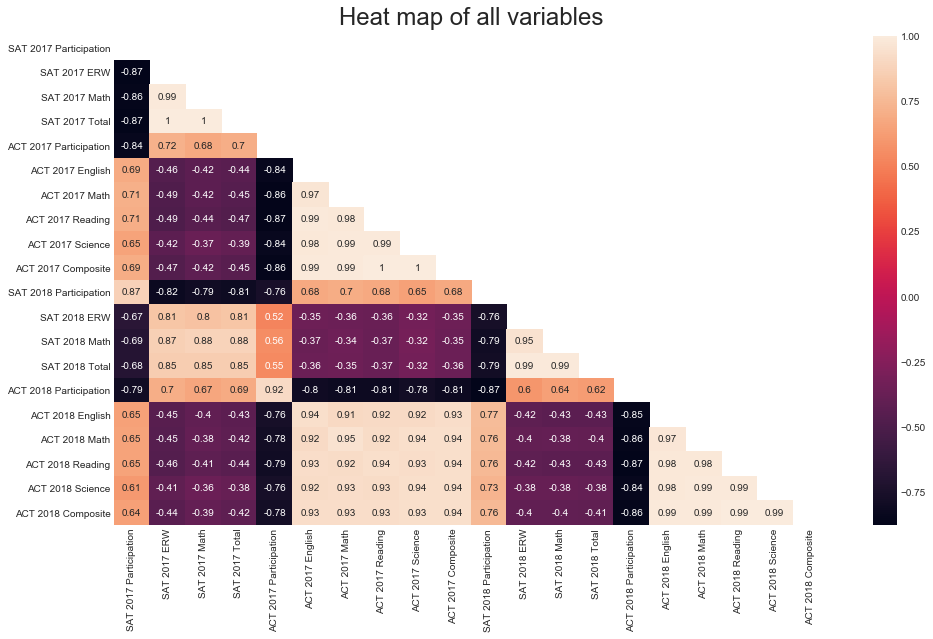

In [72]:
plt.style.use('seaborn-white')
plt.figure(figsize=(16,9))

mask = np.zeros((20,20))
mask[np.triu_indices_from(mask)] = True

plt.title('Heat map of all variables',size=24, y=1.01)
sns.heatmap(df_final.rename(ref_dict,axis=1).corr(),annot=True,mask=mask);

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [73]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, fig_title=None,num_bins=10,fig_ylabel=None, fig_xlabel=None):
    '''dataframe : Dataframe to be loaded in
    list_of_columns(list['str']) : List of columns to be plotted
    list_of_titles(list['str']) : List of titles for each subplot, must match sequence of list_of_columns
    fig_title(str, optional) : Figure title
    num_bins(int, optional) : Number of bins, default = 10
    fig_ylabel(str, optional) : Figure Y axis label
    fig_xlabel(str, optional) : Figure X axis label'''
    
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(16,9)) # You'll want to specify your figsize
    
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column],bins=num_bins) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], size=14)
            
    if fig_title is not None:    
        fig.suptitle(fig_title,size=24, y=1.05)
    
    if fig_ylabel is not None:
        fig.add_subplot(111, frameon=False)
        plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
        plt.ylabel(fig_ylabel,size=18)
    
    if fig_xlabel is not None:
        plt.xlabel(fig_xlabel,size=18)
        
    plt.tight_layout()

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

### Participation rates for SAT & ACT

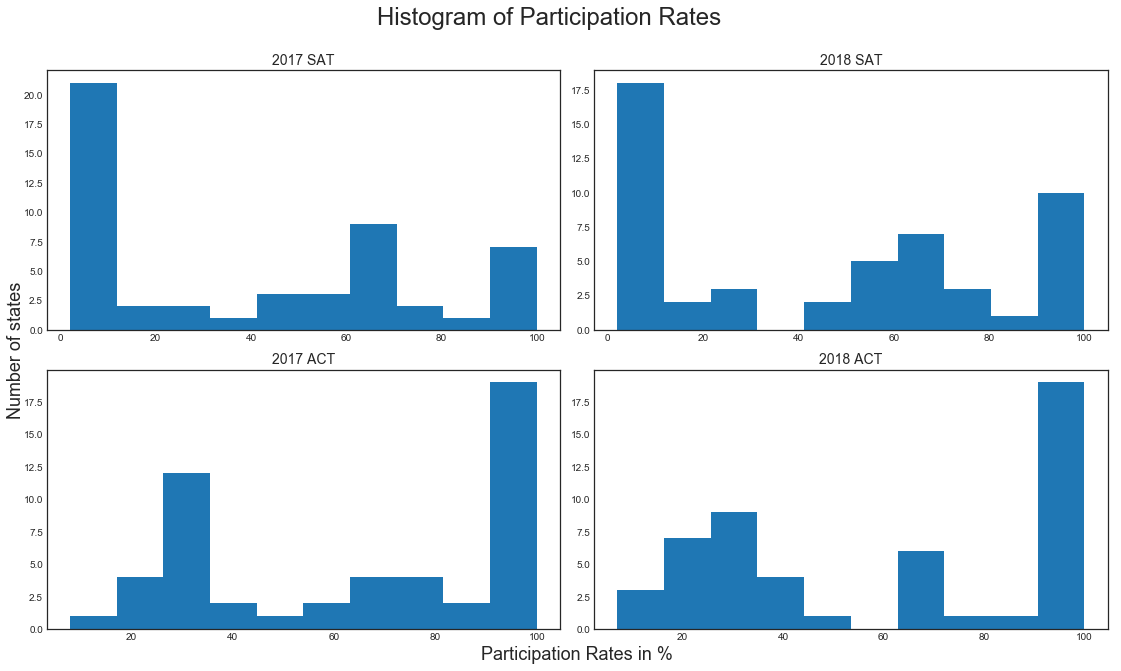

In [74]:
list_of_columns = ['sat17_partn','sat18_partn','act17_partn','act18_partn']
list_of_titles = ['2017 SAT','2018 SAT','2017 ACT', '2018 ACT']
fig_title = ('Histogram of Participation Rates')
fig_ylabel = 'Number of states'
fig_xlabel = 'Participation Rates in %'
subplot_histograms(df_final, list_of_columns, list_of_titles, fig_title=fig_title, fig_ylabel=fig_ylabel,fig_xlabel=fig_xlabel);

The histogram shows that that there is a right skew for SAT participation rates and a left skew in ACT participation rates.
This means that more states tend to have low participation rates in SAT and high participation rates in ACT.

### Math scores for SAT & ACT

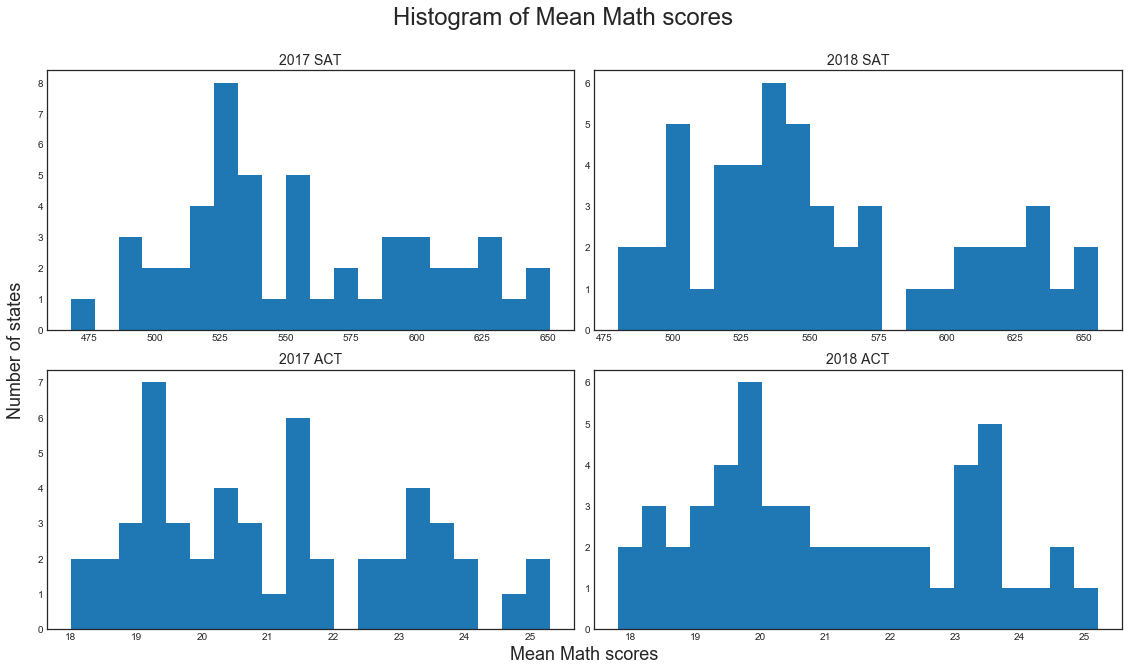

In [75]:
list_of_columns = ['sat17_math','sat18_math','act17_math','act18_math']
list_of_titles = ['2017 SAT','2018 SAT','2017 ACT', '2018 ACT']
fig_title = ('Histogram of Mean Math scores')
fig_ylabel = 'Number of states'
fig_xlabel = 'Mean Math scores'
subplot_histograms(df_final, list_of_columns, list_of_titles, num_bins=20, fig_title=fig_title, fig_ylabel=fig_ylabel,fig_xlabel=fig_xlabel);

The histograms all show a slight right skew, which indicates that more states tend to have slightly lower than average scores in Math in boths tests.

### Reading/verbal scores for SAT & ACT

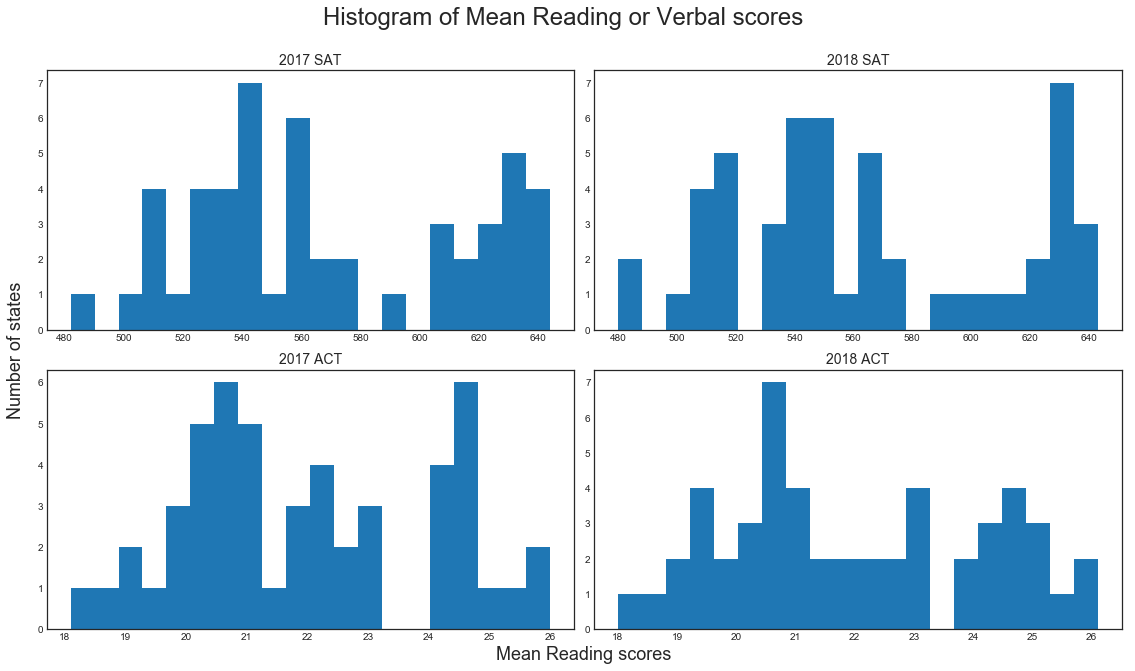

In [76]:
list_of_columns = ['sat17_erw','sat18_erw','act17_rdg','act18_rdg']
list_of_titles = ['2017 SAT','2018 SAT','2017 ACT', '2018 ACT']
fig_title = ('Histogram of Mean Reading or Verbal scores')
fig_ylabel = 'Number of states'
fig_xlabel = 'Mean Reading scores'
subplot_histograms(df_final, list_of_columns, list_of_titles, num_bins=20, fig_title=fig_title, fig_ylabel=fig_ylabel,fig_xlabel=fig_xlabel);

The histograms all show a very mild left skew, which indicates that more states tend to have average to high scores in Reading or Verbal subjects in boths tests.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [77]:
def scatter_plot(dataframe, x_variable,y_variable, fig_title=None,x_label=None, y_label=None):
    '''Function to plot scatter plot.
    dataframe : Dataframe to be loaded in
    x_variable(str) : Variable to be plotted on the x axis
    y_variable(str) : Variable to be plotted on the y axis
    fig_title(str, optional) : Figure title
    x_label(str, optional) : X axis label
    y_label(str, optinonal) : Y axis label'''
    dataframe.plot(x=x_variable, y=y_variable, kind='scatter',figsize=(16,9));
    if fig_title is not None:
        plt.title(fig_title,size=24)
    if x_label is not None:
        plt.xlabel(x_label, size=16);
    if y_label is not None:
        plt.ylabel(y_label, size=16);
   

### SAT vs. ACT math scores for 2017

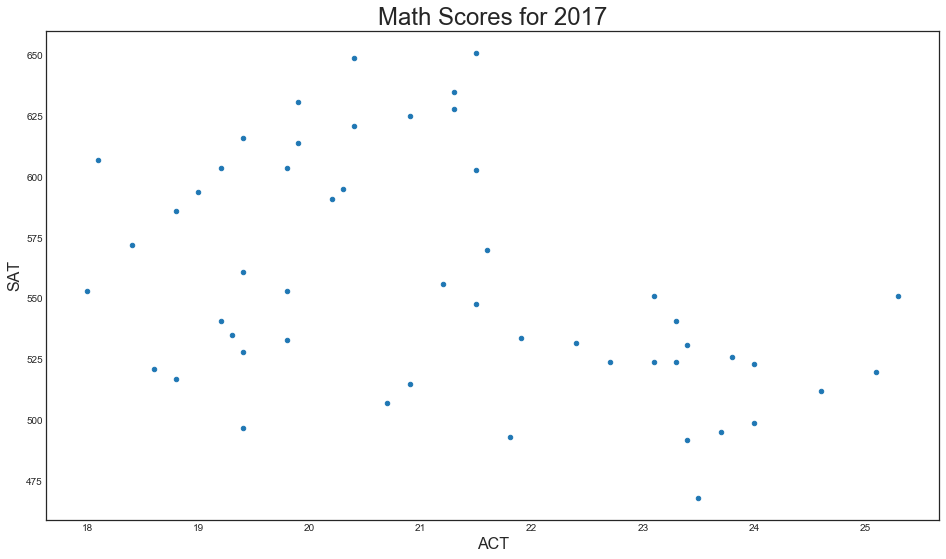

In [78]:
scatter_plot(df_final, 'act17_math', 'sat17_math','Math Scores for 2017', 'ACT','SAT')

The scatterplot above shows that there is a weak negative correlation in Math scores between SAT and ACT in 2017. Most of the plots do not show up at the bottom left or the top right part of the diagram.
States that does well in Math in one test tends to perform poorly in Math in the other test.

### SAT vs. ACT verbal/reading scores for 2017

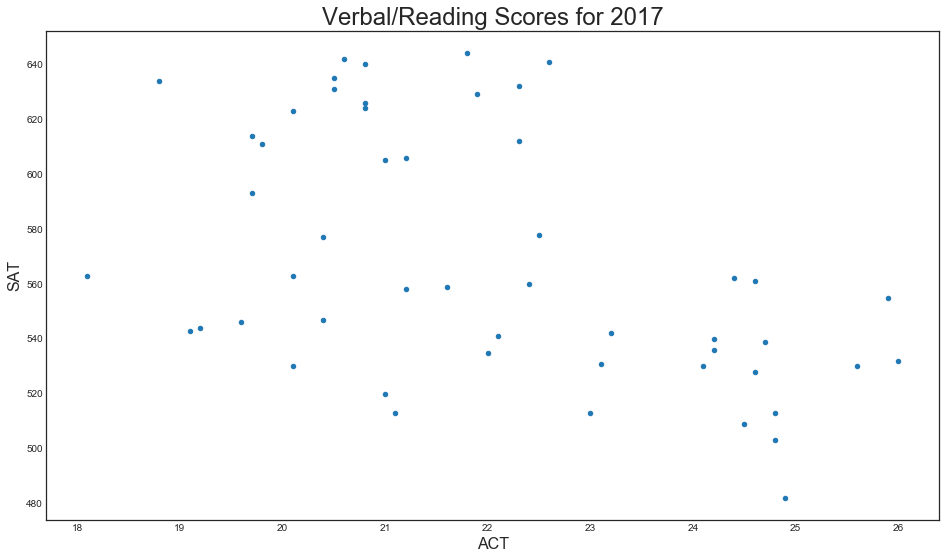

In [79]:
scatter_plot(df_final,'act17_rdg','sat17_erw','Verbal/Reading Scores for 2017','ACT','SAT')

Similarly to the previous scatterplot, the scatterplot above shows that there is a weak negative correlation in Verbal/Reading scores between SAT and ACT in 2017.
States that performs well in Verbal/Reading in one test also tends to perform poorly in Verbal/Reading in the other test.

### SAT vs. ACT total/composite scores for 2017

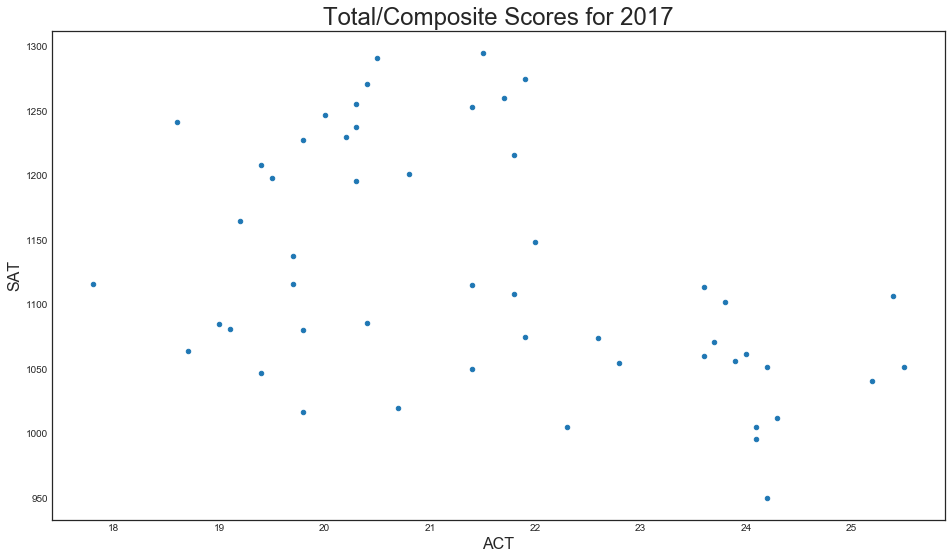

In [80]:
scatter_plot(df_final,'act17_comp','sat17_total','Total/Composite Scores for 2017','ACT','SAT')

The scatterplot above shows that there is a weak negative correlation in Total/Composite scores between SAT and ACT in 2017.
States that do well in one test tends to perform poorly in the other test.

### Total scores for SAT 2017 vs. 2018

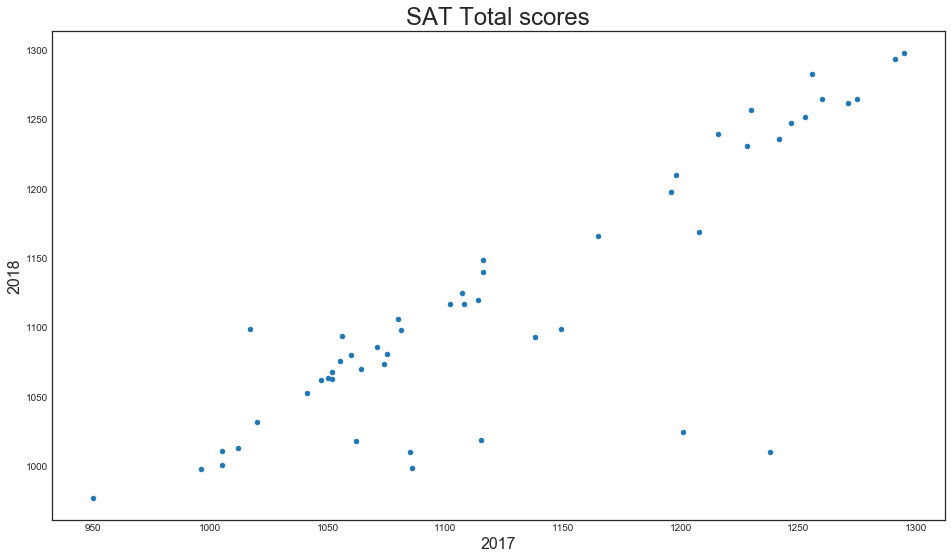

In [81]:
scatter_plot(df_final,'sat17_total','sat18_total','SAT Total scores','2017','2018')

The scatterplot above shows that there is a strong correlation in SAT Total scores between 2017 and 2018. States that tend to do well in SAT in 2017 also tends to so well again in the following year, and vice versa.

### Composite scores for ACT 2017 vs. 2018

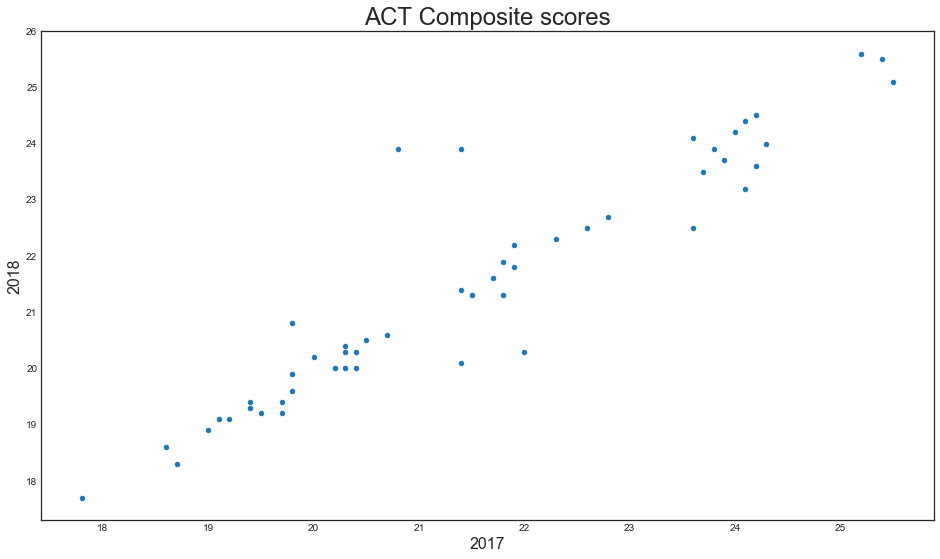

In [82]:
scatter_plot(df_final,'act17_comp','act18_comp','ACT Composite scores','2017','2018')

The scatterplot above shows that there is a strong correlation in ACT Total scores between 2017 and 2018. States that tend to do well in ACT in 2017 also tends to so well again in the following year, and vice versa.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [83]:
col_sat_sub_scores = sorted(list(df_final.columns[(df_final.columns.str.contains('sat'))&(~df_final.columns.str.contains('partn')&(~df_final.columns.str.contains('total')))]), key = lambda col:col.split('_')[1])
col_sat_ttl_scores = sorted(list(df_final.columns[(df_final.columns.str.contains('sat'))&(df_final.columns.str.contains('total'))]), key = lambda col:col.split('_')[1])
col_partn_rates = sorted(list(df_final.columns[df_final.columns.str.contains('partn')]),key=lambda col:col.split('_')[0])
col_act_scores = sorted(list(df_final.columns[df_final.columns.str.contains('act')&(~df_final.columns.str.contains('partn'))]),key = lambda col : col.split('_')[1])

In [84]:
def boxplotplot(dataframe, columns, fig_title=None,x_label=None, y_label=None):
    '''Function to plot boxplots
    dataframe : dataframe to be loaded in
    columns(list): List of columns in dataframe to be plotted out
    fig_title(str, optional) : Figure title
    x_label(str,optional) : X axis label
    y_label(str,optional): Y axis label'''
    dataframe.boxplot(column=columns, figsize=(16,9));
    if fig_title is not None:
        plt.title(fig_title,size=24, y=1.01)
    if x_label is not None:
        plt.xlabel(x_label, size=16);
    if y_label is not None:
        plt.ylabel(y_label, size=16);
    plt.xticks(range(1,len(columns)+1),[ref_dict[i] for i in columns])

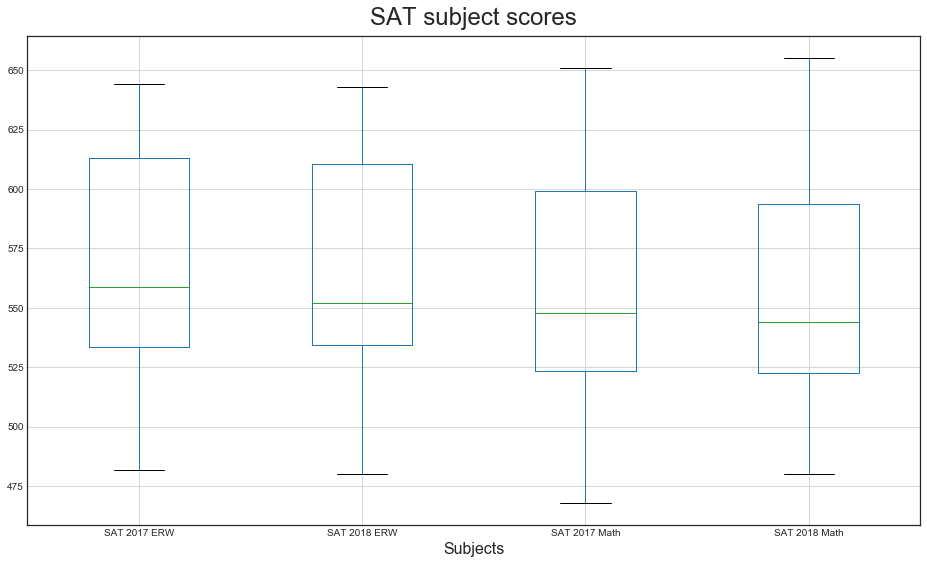

In [85]:
boxplotplot(df_final,col_sat_sub_scores, 'SAT subject scores', 'Subjects');

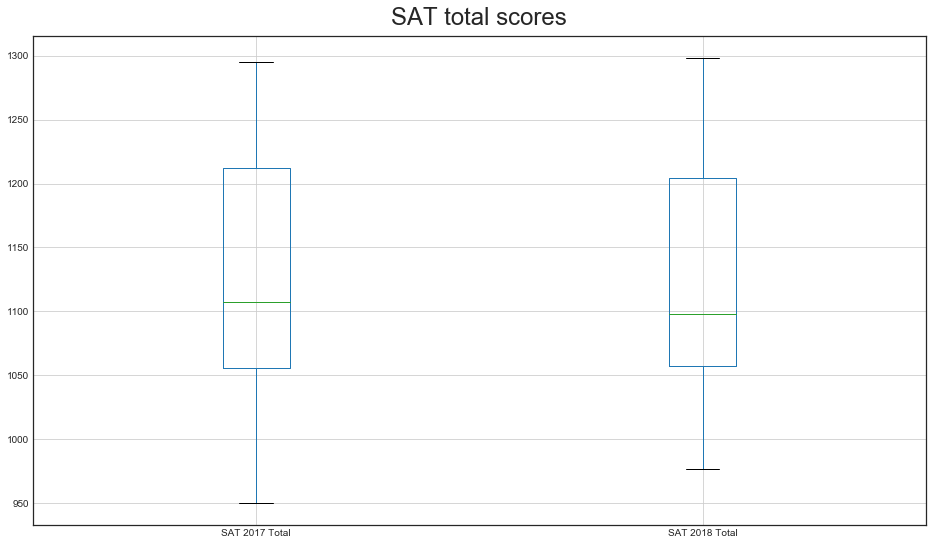

In [86]:
boxplotplot(df_final,col_sat_ttl_scores, 'SAT total scores');

By comparing the boxplot between each year and by subject, it can be observed that there is a slight dip in scores across the board. Also, the boxplot also shows that the students taking the tests are generally weaker in Math. The median lines are observed to be on the lower end of the boxplots, which means most of the students taking the tests are able to score well compared to their peers.

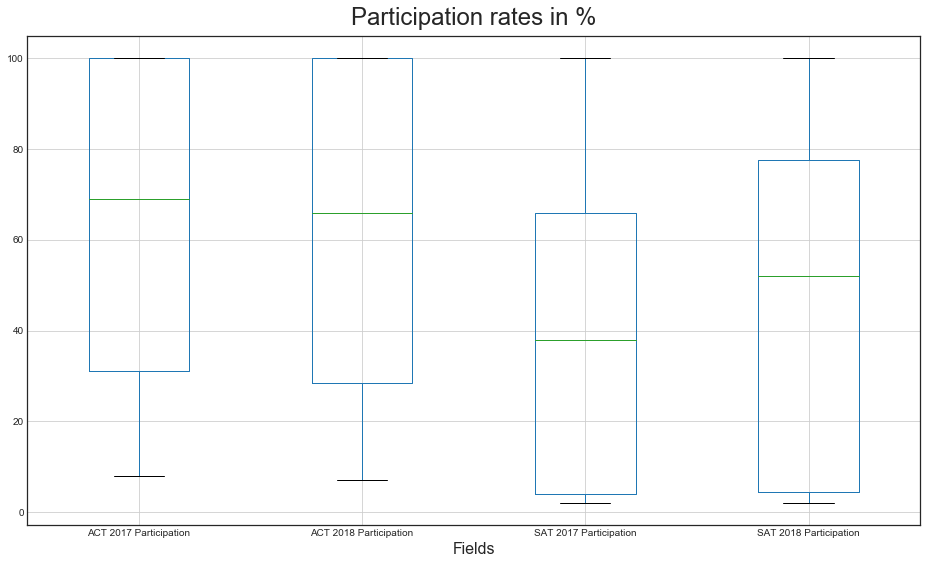

In [87]:
boxplotplot(df_final,col_partn_rates, 'Participation rates in %', 'Fields');

The boxplot above shows that there is generally not very significant change in ACT participation rates. However, there is observable increase in SAT participation rates between 2017 and 2018.

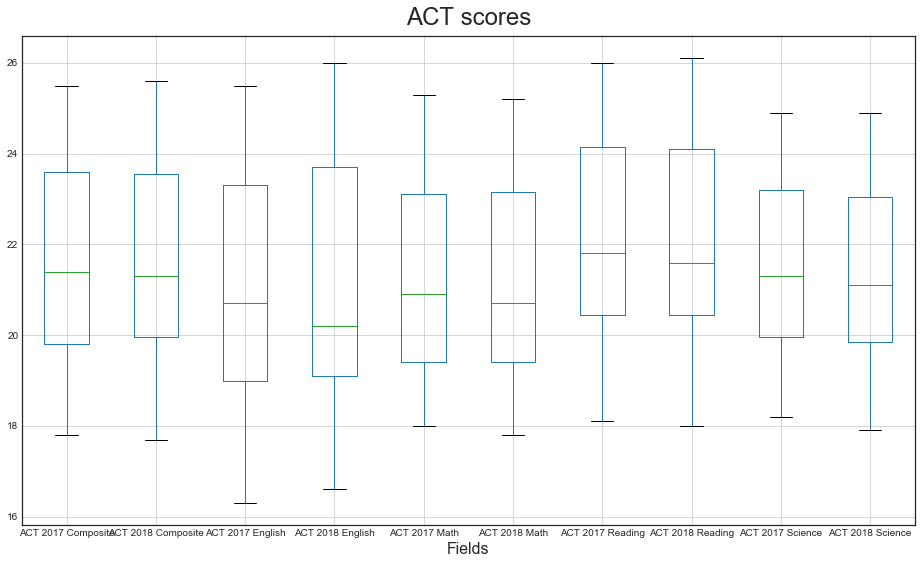

In [88]:
boxplotplot(df_final,col_act_scores, 'ACT scores', 'Fields');

By comparing the boxplot between each year and by subject, it can be observed that there is a little change in scores across the board. Also, the boxplot also shows that the students taking the tests are generally weaker in Math and Science, compared to English and Reading. Similar to the SAT scores, the median lines are observed to be on the lower end of the boxplots, which indicate that most of the students taking the tests are able to score well compared to their peers.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

## Area of interest : Change in SAT participation rates vs Percentage change in performance
Which states increased their SAT participation between the two years the most and what happened to their performance?
And vice versa.

In [89]:
def pct_change(a,b):
    '''Function to calculate percentage change to 2 decimal places
a : new value
b : old value'''
    return round((a-b)/b*100,2)

In [90]:
# List of areas to calculate
area_list = ['partn','erw','math','total','eng','math','rdg','sci','comp']

# Calculate change in SAT participation rate
df_final['sat_'+area_list[0]+'_change'] = df_final['sat18_'+area_list[0]]-df_final['sat17_'+area_list[0]]

# Calculate percentage changes in the SAT scores
for i  in range(1,4):
    df_final['sat_'+area_list[i]+'_change_pct'] = round(pct_change(df_final['sat18_'+area_list[i]],df_final['sat17_'+area_list[i]]),1)

# Calculate change in ACT participation rate
df_final['act_'+area_list[0]+'_change'] = df_final['act18_'+area_list[0]]-df_final['act17_'+area_list[0]]

# Calculate percentage changes in the ACT scores
for j in range(4,len(area_list)):
     df_final['act_'+area_list[j]+'_change_pct'] = round(pct_change(df_final['act18_'+area_list[j]],df_final['act17_'+area_list[j]]),1)

In [91]:
# View the states which increased their SAT particpation the most between the two years
new_col = ['state']
new_col.extend([col for col in df_final.columns if 'change' in col])
df_final[new_col].sort_values('sat_partn_change', ascending=False).rename(ref_dict,axis=1).head()

,State,Change in SAT Participation,% Change in SAT ERW,% Change in SAT Math,% Change in SAT Total,Change in ACT Participation,% Change in ACT English,% Change in ACT Math,% Change in ACT Reading,% Change in ACT Science,% Change in ACT Composite
13,Illinois,90.0,-8.2,-9.0,-8.6,-50.0,14.8,10.4,12.0,9.9,11.7
5,Colorado,89.0,-14.4,-15.0,-14.6,-70.0,18.9,14.3,15.1,12.4,14.9
39,Rhode Island,26.0,-4.8,-3.6,-4.1,-6.0,1.7,1.3,1.2,0.4,0.8
48,West Virginia,14.0,-8.1,-8.0,-8.0,-4.0,-1.0,0.0,0.5,-0.5,-0.5
30,New Jersey,12.0,3.2,4.0,3.6,-3.0,0.0,-0.8,-0.4,-0.9,-0.8


Illinois and Colorado significantly increased their SAT participation rate (~90%) between 2017 and 2018. Both their SAT total scores dropped by 8.6% and 14.6% respectively. Both states also saw significant decrease in their ACT participation rates (Illinois: 50%, Colorado: 70%) and their ACT composite scores rose by 10 to 15 percent.

Interestingly, West Virginia increased its SAT participation rate only by 14%, but also saw similar amount of decrease in SAT total score as Illinois. Its ACT participation rate dropped only by 4% and its ACT composite scores fell by a small 0.5%.

In [92]:
# View the states which decreased their SAT particpation the most between the two years
df_final[new_col].sort_values('sat_partn_change').rename(ref_dict,axis=1).head() 

,State,Change in SAT Participation,% Change in SAT ERW,% Change in SAT Math,% Change in SAT Total,Change in ACT Participation,% Change in ACT English,% Change in ACT Math,% Change in ACT Reading,% Change in ACT Science,% Change in ACT Composite
9,Florida,-27.0,5.8,10.5,8.1,-7.0,1.0,-0.5,0.5,0.5,0.5
8,District of Columbia,-8.0,3.1,2.6,2.8,0.0,-2.9,-3.4,-2.0,-2.1,-2.5
28,Nevada,-3.0,2.0,2.4,2.2,0.0,1.8,-1.1,-0.6,-1.6,-0.6
2,Arizona,-1.0,2.5,3.4,3.0,4.0,-2.2,-2.0,-3.0,-3.0,-2.5
50,Wyoming,0.0,1.1,3.5,2.2,0.0,-2.1,-0.5,-1.0,-1.5,-1.0


Florida saw the most significant drop in SAT participation rates. Their SAT total scores increased by 8% between 2017 and 2018.
However, its ACT participation rates also fell by 7%., but its ACT composite scores remain relatively unaffected by a change of only 0.5%.

In [93]:
# View the states which increased their SAT particpation the most between the two years
df_final[new_col].sort_values('act_partn_change', ascending=False).rename(ref_dict,axis=1).head()

,State,Change in SAT Participation,% Change in SAT ERW,% Change in SAT Math,% Change in SAT Total,Change in ACT Participation,% Change in ACT English,% Change in ACT Math,% Change in ACT Reading,% Change in ACT Science,% Change in ACT Composite
35,Ohio,6.0,-4.5,-4.0,-4.4,25.0,-9.0,-6.0,-7.6,-7.3,-7.7
27,Nebraska,0.0,0.0,-0.3,-0.1,16.0,-7.2,-5.3,-6.8,-6.5,-6.1
2,Arizona,-1.0,2.5,3.4,3.0,4.0,-2.2,-2.0,-3.0,-3.0,-2.5
20,Maryland,7.0,1.7,2.1,1.9,3.0,-5.2,-4.8,-4.6,-4.3,-4.7
37,Oregon,5.0,0.7,0.9,0.8,2.0,-2.8,-2.8,-2.2,-2.8,-2.3


Ohio has the highest increase (25%) in ACT participation rates as well as a slight increase (6%) in SAT participation rates.

In [94]:
# View the states which decreased their ACT particpation the most between the two years
df_final[new_col].sort_values('act_partn_change').rename(ref_dict,axis=1).head()

,State,Change in SAT Participation,% Change in SAT ERW,% Change in SAT Math,% Change in SAT Total,Change in ACT Participation,% Change in ACT English,% Change in ACT Math,% Change in ACT Reading,% Change in ACT Science,% Change in ACT Composite
5,Colorado,89.0,-14.4,-15.0,-14.6,-70.0,18.9,14.3,15.1,12.4,14.9
13,Illinois,90.0,-8.2,-9.0,-8.6,-50.0,14.8,10.4,12.0,9.9,11.7
1,Alaska,5.0,2.7,2.1,2.4,-32.0,5.9,4.0,5.9,4.0,5.0
9,Florida,-27.0,5.8,10.5,8.1,-7.0,1.0,-0.5,0.5,0.5,0.5
22,Michigan,0.0,0.4,0.8,0.6,-7.0,1.7,0.8,0.8,0.4,1.2


Other than Colorado and Illinois, which saw rather drastic changes in their participation rates in both tests between 2017 and 2018, Alaska also had a significant drop in ACT participation rates with a small increase in SAT participation rates.

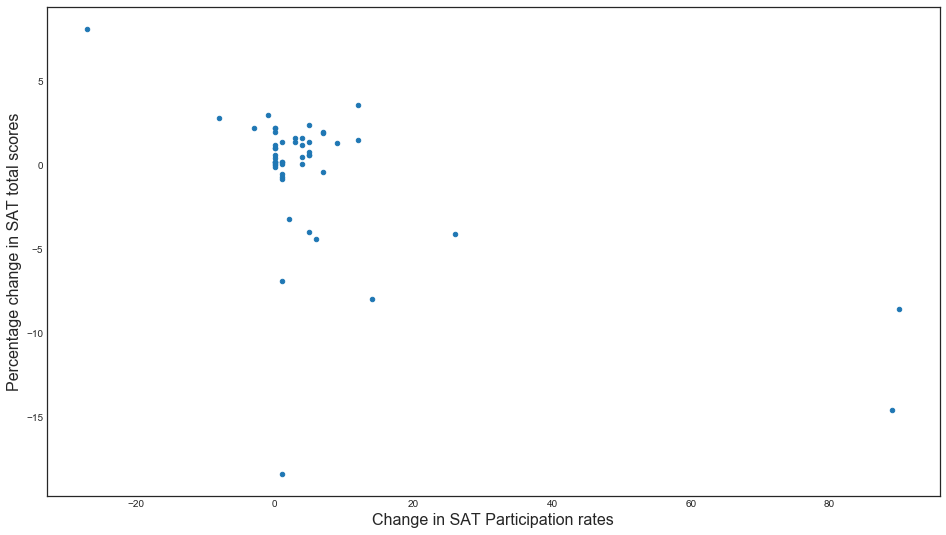

In [95]:
scatter_plot(df_final,'sat_partn_change','sat_total_change_pct',x_label='Change in SAT Participation rates',y_label='Percentage change in SAT total scores')

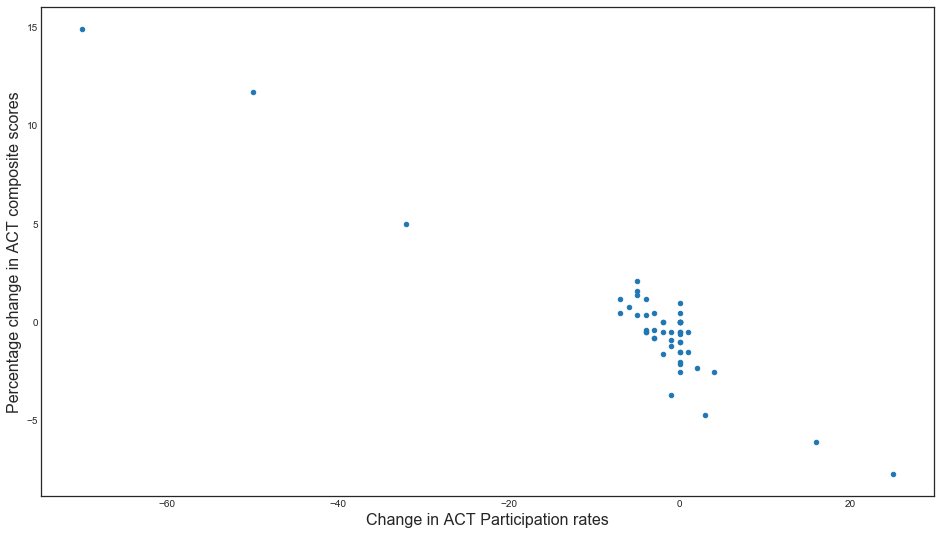

In [96]:
scatter_plot(df_final,'act_partn_change','act_comp_change_pct',x_label='Change in ACT Participation rates',y_label='Percentage change in ACT composite scores')

The two plots above suggest that when there is little change in partipation rates for either tests, the total/composite scores remain relatively stable. However, when there is drastic increase/decrease in participation rates, it will have an inverse impact on the total/composite scores as well.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

###### Answers:

**SAT 2017 Participation rates** has a mean of 39.8, which is higher than its median of 38.
This implies that the distribution is **right skewed**. Its standard deviation is 35.28, which is large considering the min and max values of 4 and 100. This means that the spread is **wide**.

**SAT 2017 Evidence-Based Reading and Writing** has a mean of 569.12, which is higher than its median of 559.
This implies that the distribution is **right skewed**. Its standard deviation is 45.67, which is large considering the min and max values of 482 and 644. This means that the spread is **wide**.

**SAT 2017 Math** has a mean of 556.88, which is higher than its median of 548.
This implies that the distribution is **right skewed**. Its standard deviation is 47.12, which is large considering the min and max values of 468 and 651. This means that the spread is **wide**.

**SAT 2017 Total** has a mean of 1126.1, which is higher than its median of 1107.
This implies that the distribution is **right skewed**. Its standard deviation is 92.5, which is large considering the min and max values of 950 and 1295. This means that the spread is **wide**.

**SAT 2018 Participation rates** has a mean of 45.75, which is lower than its median of 52.
This implies that the distribution is **left skewed**. Its standard deviation is 37.31, which is large considering the min and max values of 2 and 100. This means that the spread is **wide**.

**SAT 2018 Evidence-Based Reading and Writing** has a mean of 563.69, which is higher than its median of 552.
This implies that the distribution is **right skewed**. Its standard deviation is 47.5, which is large considering the min and max values of 480 and 643. This means that the spread is **wide**.

**SAT 2018 Math** has a mean of 556.23, which is higher than its median of 544.
This implies that the distribution is **right skewed**. Its standard deviation is 47.78, which is large considering the min and max values of 480 and 655. This means that the spread is **wide**.

**SAT 2018 Total** has a mean of 1120.02, which is higher than its median of 1098. This implies that the distribution is **right skewed**. Its standard deviation is 94.15, which is large considering the min and max values of 977 and 1298. This means that the spread is **wide**.

**ACT 2017 Participation rates** has a mean of 65.25, which is smaller than its median of 69. This implies that the distribution is **left skewed**. Its standard deviation is 32.14, which is large considering the min and max values of 8 and 100. This means that the spread is **wide**.

**ACT 2017 English** has a mean of 20.93, which is larger than its median of 20.7. This implies that the distribution is **right skewed**. Its standard deviation is 2.35, which is large considering the min and max values of 16.3 and 25.5. This means that the spread is **wide**.

**ACT 2017 Math** has a mean of 21.18, which is larger than its median of 20.9. This implies that the distribution is **right skewed**. Its standard deviation is 1.98, which is large considering the min and max values of 18 and 25.3. This means that the spread is **wide**.

**ACT 2017 Reading** has a mean of 22.01, which is larger than its median of 21.8. This implies that the distribution is **right skewed**. Its standard deviation is 2.07, which is large considering the min and max values of 18.1 and 26. This means that the spread is **wide**.

**ACT 2017 Science** has a mean of 21.45, which is larger than its median of 21.3. This implies that the distribution is **right skewed**. Its standard deviation is 1.74, which is large considering the min and max values of 18.2 and 24.9. This means that the spread is **wide**.

**ACT 2017 Composite** has a mean of 21.52, which is larger than its median of 21.4. This implies that the distribution is **right skewed**. Its standard deviation is 2.02, which is large considering the min and max values of 17.8 and 25.5. This means that the spread is **wide**.

**ACT 2018 Participation rates** has a mean of 61.65, which is smaller than its median of 66. This implies that the distribution is **left skewed**. Its standard deviation is 34.08, which is large considering the min and max values of 7 and 100. This means that the spread is **wide**.

**ACT 2018 English** has a mean of 20.99, which is larger than its median of 20.2. This implies that the distribution is **right skewed**. Its standard deviation is 2.45, which is large considering the min and max values of 16.6 and 26. This means that the spread is **wide**.

**ACT 2018 Math** has a mean of 20.99, which is larger than its median of 20.2. This implies that the distribution is **right skewed**. Its standard deviation is 2.45, which is large considering the min and max values of 16.6 and 26. This means that the spread is **wide**.

**ACT 2018 Reading** has a mean of 21.12, which is larger than its median of 20.7. This implies that the distribution is **right skewed**. Its standard deviation is 2.04, which is large considering the min and max values of 17.8 and 25.2. This means that the spread is **wide**.

**ACT 2018 Science** has a mean of 21.35, which is larger than its median of 21.1. This implies that the distribution is **right skewed**. Its standard deviation is 1.87, which is large considering the min and max values of 17.9 and 24.9. This means that the spread is **wide**.

**ACT 2018 Composite** has a mean of 21.49, which is larger than its median of 21.3. This implies that the distribution is **right skewed**. Its standard deviation is 2.11, which is large considering the min and max values of 17.7 and 25.6. This means that the spread is **wide**.

The above are descriptions based on the measures of central tendency, standard deviation and range of each variable.
These are assuming to that the distributions of these variables are normal.
However, when we look at the histograms plotted earlier, there are some variables, i.e. SAT and ACT mean Math scores or mean Reading or Verbal scores, which resemble more closely to a [normal distribution](#Math-scores-for-SAT-&-ACT) . But variables like the 2018 SAT Participation rates seems more like a [multi-modal distribution](#Participation-rates-for-SAT-&-ACT).

Therefore, though we can give a verbal description based on statistics, it is important to plot out the distribution to be able to have clearer visual understanding.


#### Distributions in the data

In this dataset, each data represents a sample from a population.                        
For example, for ACT math test:
- Population: the test results of all the students who take this test, nation-wide.
- Population mean: is the national average of ACT math test (total scores/total no. of test takers) 
- Sample: the state means of ACT math test. We have 51 samples (51 states)

***According to CLT, we generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?***

###### Answer:

Yes, based on the [histogram](#Math-scores-for-SAT-&-ACT), we do see a rough resemblence to a normal distribution.

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

###### Answer:

The assumption holds for Math and Reading scores, but only to a certain degree. In CLT, we take a number of random samples of the same size. In our case, the sample size of each of the 51 samples is dependent on the number of students in each state which took the Math or Reading tests. We do not possess the data for the number of students who took this test in each state, and it is highly unlikely that the sample sizes for every state are the same.

However, their values are already the mean score value for each state. Therefore, these are sample means and we can apply CLT to a certain degree.

As the samples are grouped geographically and not picked randomly, the estimates from these data are likely to be far from the true value.

For participation rates, we cannot assume that it will be normally distributed. Similar to the Math and Reading scores, the sample values are grouped geographically. The effect of each state's preferences or policies can result in a multi-modal distribution, as seen in the [histograms](#Participation-rates-for-SAT-&-ACT) plotted. As a result, we cannot make populations estimates for Participation rates.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actual populations these data describe in answering this question)*

###### Answer:

It does not make sense to conduct statistical inference.

At the state level, there is only one pair of data: ACT 2017 and SAT 2017 participation rates in percentages. We do not know the population size and the breakdown of students who either take SAT or ACT or both or none.

At the national level, each state only provide a pair of data in percentages. Similarly, we do not know the population size of each state. For example, 80 percent of 100,000 students in one state can have more impact than 100 percent of 50,000 students in another.

Without more detailed breakdown in data, it is difficult to understand the relationship between SAT and ACT participation rates in 2017.

##### Is it appropriate to compare *these* specific SAT and ACT math scores  - can we say students with higher SAT math score is better than those with lower ACT math score, or vice versa?

Why or why not?

###### Answer:

The histograms and boxplots for both SAT and ACT math scores suggest shows similar distributions nation wide.
There is no significantly higher percentage of higher-than-median scorers between the two tests, which might suggest that one test might be easier to score than the other.

However, based on the heat map data, states with higher SAT scores tend to have lower SAT participation rates, and vice versa. This applies to ACT as well. A state's ACT participation rates is negatively correlated with its SAT participation rate.
With this difference in participation rates, it is difficult at the state level to compare students of math scores from one test against other students with math scores from the other test.

Therefore, it is not appropriate to compare these scores.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

---
**Colorado** saw a spike in SAT participation rates and a huge drop in ACT participation rates between the two years.
Based on external research, this is a result of a testing reform legislation ([1]) that ended in a partnership between Colorado and the College Board to make SAT the state's mandatory accountability exam ([2]). Prior to this, ACT was Colorado's requirement for every high school junior since 2001 ([3]). This formal switch from SAT to ACT had contributed to the decrease in ACT participation rates.

Changes in **Illinois'** participation rates in both SAT and ACT were similar to Colorado. Another area in which they were similar was that it had implemented ACT as its state-wide assessment program since 2001. However, the contract with ACT expired in 2016, opening up a new contract bid ([4]). After evaluation by a panel of educators and other officials, SAT was deemed as "better aligned with standards for what students should know in Illinois" and won the bid. Hence, there was a sudden increase in SAT participation rates. The drop in ACT, however, was not as much as Colorado's. This might be attributed to the mindset that "midwestern colleges - including most Illinois colleges - look for the ACT". ([5])


**Ohio** is interesting as it had the highest increase in ACT participation rates (25%) and yet also saw an increase in participation rates for SAT, albeit much smaller at 6%. Once again, it was observed that this change was driven by policy. At that time, Ohio high schools were required to give their students either ACT or SAT. [6] Even with the freedom to choose, there is significant more increase in ACT than SAT. Ohio, like Illinois, is also a midwestern state, which might explain the preference for ACT.

---
During the course of  conducting these outside research, other factors or perspectives were discovered, which are helpful or harmful to the goal of increasing participation rates. They are:

**FOR**
- SAT's new format from 2016 is considered more attractive as it
    - removed penalties for guessing ([7])
    - is assessed to be aligned to Common Core standards in English and Math ([3])
    - measures the skills and knowledge that has been empirically shown to indicate readiness for jobs or higher education ([3])
- College Board’s reporting system helps students plan their education needs via additional access to additional resources and activities ([3])
- College Board's partnership with Khan Academy to provide free, personalized test preparation for any student with computer access, therefore helping students from lower-income families ([3])
- SAT is generally considered more reason-based and focuses more on critical thinking, while the ACT is regarded as more of a fact-recall test ([1])
- SAT School Day testing that enables students to take the SAT on a school day, generally for free, granting more accessibility to students ([8])

**AGAINST**

- SAT is generally regarded as more accepted by colleges on the East and West coasts while midwestern colleges prefers the ACT. ([5])
- Certain states may have a long history of using ACT and therefore might value the data accumulated over time ([1]) and resist adopting the SAT
- Test-optional movement, where colleges do not consider neither ACT nor SAT scores for admission, is gaining traction ([8])

---

From the states identified, it appears that state policy is the main driving factor that will influence participation rates.

Additional data about each state's education policy is sourced from Testive ([9]) This data will be helpful in making a decision on which state to focus on to raise participation rates.

**References**
1. Gorski, E. ( December 23, 2015) Goodbye ACT, hello SAT: a significant change for Colorado high schoolers. Retrieved from https://chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/
2. Wheeler, D. (January 8, 2017) Colorado Changed to the SAT in 2017: What You Need to Know. Retrieved from https://www.testive.com/colorado-sat-change-2017/
3. (January 2016) Colorado’s Switch from ACT to SAT Retrieved from https://www.coloradokids.org/wp-content/uploads/2016/01/ACTvsSAT_FINAL.pdf
4. Rado, D. (February 11, 2016) Illinois moves ahead with new testing plan, replacing ACT with SAT. Retrieved from https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html
5. Wolf, T. (December 21, 2015) Illinois switching from ACT, will give students SAT instead. Retrieved from https://www.bnd.com/news/local/article50939170.html
6. Gilchrist, S. (February 28, 2017) Ohio schools must now give ACT or SAT to all juniors. Retrieved from https://www.dispatch.com/news/20170228/ohio-schools-must-now-give-act-or-sat-to-all-juniors
7. Safier, R. (March 19, 2016) New SAT Format: What It Means for You. Retrieved from https://blog.prepscholar.com/new-sat-format-2016
8. Anderson , N. (September 24, 2019) SAT scores drop for s2019 class, but participation rises through testing in schools. Retrieved from https://www.washingtonpost.com/local/education/sat-scores-drop-for-2019-class-but-participation-rises-through-testing-in-schools/2019/09/23/332fc4d0-de11-11e9-8dc8-498eabc129a0_story.html
9. March, K. (May 3, 2018) Does your state require the SAT or ACT? Retrieved from https://www.testive.com/state-sat-act/

[1]:https://chalkbeat.org/posts/co/2015/12/23/goodbye-act-hello-sat-a-significant-change-for-colorado-high-schoolers/
[2]:https://www.testive.com/colorado-sat-change-2017/
[3]:https://www.coloradokids.org/wp-content/uploads/2016/01/ACTvsSAT_FINAL.pdf
[4]:https://www.chicagotribune.com/news/ct-illinois-chooses-sat-met-20160211-story.html
[5]:https://www.bnd.com/news/local/article50939170.html
[6]:https://www.dispatch.com/news/20170228/ohio-schools-must-now-give-act-or-sat-to-all-juniors
[7]:https://blog.prepscholar.com/new-sat-format-2016
[8]:https://www.washingtonpost.com/local/education/sat-scores-drop-for-2019-class-but-participation-rises-through-testing-in-schools/2019/09/23/332fc4d0-de11-11e9-8dc8-498eabc129a0_story.html
[9]:https://www.testive.com/state-sat-act/

In [199]:
# import new data source
df_state_req = pd.read_csv('../data/state_requirements_2018.csv')

In [200]:
# Map 0 or 1 values to bool
df_state_req['sat_reqd'] = df_state_req['sat_reqd'].map({0:False, 1:True})
df_state_req['act_reqd'] = df_state_req['act_reqd'].map({0:False, 1:True})

In [201]:
# Merge with new data
df_final = pd.merge(df_final, df_state_req, how='left')

In [202]:
df_final.columns

Index(['state', 'sat17_partn', 'sat17_erw', 'sat17_math', 'sat17_total',
       'act17_partn', 'act17_eng', 'act17_math', 'act17_rdg', 'act17_sci',
       'act17_comp', 'sat18_partn', 'sat18_erw', 'sat18_math', 'sat18_total',
       'act18_partn', 'act18_eng', 'act18_math', 'act18_rdg', 'act18_sci',
       'act18_comp', 'sat_partn_change', 'sat_erw_change_pct',
       'sat_math_change_pct', 'sat_total_change_pct', 'act_partn_change',
       'act_eng_change_pct', 'act_math_change_pct', 'act_rdg_change_pct',
       'act_sci_change_pct', 'act_comp_change_pct', 'sat_reqd', 'act_reqd'],
      dtype='object')

## Conclusions and Recommendations

Based on your exploration of the data, what are your key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

In [203]:
# Define columns to included only Participation rates and State requirements
cols = list([col for col in df_final.columns if (('partn' in col)&('18' in col))|('reqd' in col)|('state' in col)])

In [204]:
# List participations rates and State requirements
df_final[cols].sort_values('sat18_partn').rename(ref_dict,axis=1).head(10)

,State,SAT 2018 Participation,ACT 2018 Participation,SAT Required,ACT Required
34,North Dakota,2.0,98.0,False,True
50,Wyoming,3.0,100.0,False,True
41,South Dakota,3.0,77.0,False,False
27,Nebraska,3.0,100.0,False,True
49,Wisconsin,3.0,100.0,False,True
24,Mississippi,3.0,100.0,False,True
15,Iowa,3.0,68.0,False,False
44,Utah,4.0,100.0,False,True
23,Minnesota,4.0,99.0,False,False
18,Louisiana,4.0,100.0,False,True


Based on the provided data, we were able to derive the inverse relationships between the participation rates of the two tests, between each test's participation rates and its scores and also between each test's change in participation rates and its change in scores. However, the mean scores are more likely to be resultant of participant rates rather than being influencing factors. One key takeaway is that states usually prefer one test over another and are likely to focus more on one test only.

Further research indicates that state policy is the decisive factor that impacts participation rates. From the examples of Colorado and Illinois, the shift of state wide testing from ACT to SAT as mandated by each state's Department of Education proved to be the reason that drastically raised SAT participation rates.

Based on the table above, amongst the states with the lowest SAT participation rates, **South Dakota** does not make either SAT or ACT mandatory for its high school students, though it still has rather high ACT participation rates. This can be attributed to its geographical location, being also a mid-western state. The attitudes in the region seem to lean more towards using ACT test scores for college admission.

However, Illinois is also a mid-western state, yet it switched over from ACT to SAT after evaluating SAT's merits. Therefore, it is recommended that the College Board invest money into South Dakota to inform their students and educators the merits of SAT, such as the revamped format, its supporting programmes such as its reporting system, the free test preparation partnership with Khan Academy and propose its SAT School day that opens up accessibility to college for lower income families. This advocacy can also be extended to South Dakota colleges. As the main driving reason for these tests is for college admission, convincing colleges in this region to be receptive to considering SAT scores will also be helpful.

One broad area to be cautious of, however, is the test-optional movement. Colleges are increasingly dropping both SAT or ACT scores from their admission evaluation, claiming that these scores do not necessarily accurately predict student success. Therefore, more studies need to be conducted to verify these claims. The College Board was able to improve national participation rates by making its format relevant or coming up with student-centric programmes that bring value to the students. Therefore, it is also important to identify areas which can bring value to colleges that uses SAT scores for admission. This will ensure relevancy and keep SAT participation rates high.